In [0]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import IntegerType, DoubleType
from pyspark import SparkFiles
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# 그래프 모양 설정
plt.style.use("seaborn")
# 글자 크기설정
sns.set(font_scale = 2)

In [0]:
# 경고 메시지가 출력되지 않도록 설정
import warnings
warnings.filterwarnings("ignore")

In [0]:
# 구글 드라이브의 titanic.csv 다운 경로
url = "https://drive.google.com/uc?id=1lr7b1GbVARHpIQP-xw7UVD2R7al9bYKg"


In [0]:
# url로부터 다운 받은 파일 폴더 저장
spark.sparkContext.addFile(url)

In [0]:
# 폴더 경로 조회
SparkFiles.getRootDirectory()

Out[7]: '/local_disk0/spark-d40645d4-770a-4e83-9609-2b9dd03ad044/userFiles-2aa70153-78a4-4e1b-83b5-9c51397bca12'

In [0]:
# 폴더 파일 리스트 조회
os.listdir(SparkFiles.getRootDirectory())

Out[8]: ['uc']

In [0]:
# 다운 받은 폴더의 파일 중 파일명 uc 를 읽어서 리턴받아
# csv 파일을 SparkDataFrame 으로 생성, header=True : csv 파일의 첫번째 줄은 칸 이름인 것을 명시
df_train = spark.read.csv("file://"+SparkFiles.get("uc"), header=True)


## 데이터 컬럼 설명
<br>

![image](https://github.com/aaingyunii/Bootcamp_TIL/assets/31847834/525ac3bc-e4b8-4a14-be00-99d46d471c56)

In [0]:
# 데이터프레임 데이터 출력
df_train.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|null|    0|    0|          33087

In [0]:
type(df_train)
# spark 의 DataFrame 타입

Out[11]: pyspark.sql.dataframe.DataFrame

In [0]:
# 컬럼 데이터 타입 조회
df_train.schema
# 모든 데이터 타입이 String

Out[13]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,StringType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,StringType,true),StructField(SibSp,StringType,true),StructField(Parch,StringType,true),StructField(Ticket,StringType,true),StructField(Fare,StringType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,StringType,true)))

In [0]:
df_train.schema.names

Out[15]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
col_name_list = df_train.schema.names

# test
# col_name_list[4:6]

Out[17]: ['Age', 'SibSp']

In [0]:
# int 타입으로 바꿔야할 컬럼명들
int_col_names = col_name_list[1:2] + col_name_list[5:7] + col_name_list[11:12]

print(int_col_names)

['Pclass', 'SibSp', 'Parch', 'Survived']


In [0]:
# int 타입으로 변경

for i in int_col_names:
    print("컬럼명 : ", i)
    df_train = df_train.withColumn(i , df_train[i].cast("int"))
    print("="*100)

컬럼명 :  Pclass
컬럼명 :  SibSp
컬럼명 :  Parch
컬럼명 :  Survived


In [0]:
# 변경된 지 컬럼 타입 다시 조회
df_train.schema

Out[20]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,IntegerType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,StringType,true),StructField(SibSp,IntegerType,true),StructField(Parch,IntegerType,true),StructField(Ticket,StringType,true),StructField(Fare,StringType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,IntegerType,true)))

In [0]:
# double 타입으로 바꿔야할 컬럼명들
double_col_names = col_name_list[4:5] + col_name_list[8:9]

print(double_col_names)

['Age', 'Fare']


In [0]:
# double 타입으로 변경

for i in double_col_names:
    print("컬럼명 : ", i)
    df_train = df_train.withColumn(i , df_train[i].cast("double"))
    print("="*100)

컬럼명 :  Age
컬럼명 :  Fare


In [0]:
# 변경된 지 컬럼 타입 다시 조회
df_train.schema

Out[23]: StructType(List(StructField(PassengerId,StringType,true),StructField(Pclass,IntegerType,true),StructField(Name,StringType,true),StructField(Sex,StringType,true),StructField(Age,DoubleType,true),StructField(SibSp,IntegerType,true),StructField(Parch,IntegerType,true),StructField(Ticket,StringType,true),StructField(Fare,DoubleType,true),StructField(Cabin,StringType,true),StructField(Embarked,StringType,true),StructField(Survived,IntegerType,true)))

In [0]:
df_train.show()

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       1|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|       0|
|          6|     3|    Moran, Mr. James|  male|null|    0|    0|          33087

In [0]:
# 각 컬럼의 개수, 평균, 표준편차, 최솟값 등 출력
display(df_train.summary())

summary,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891,891,891,891,714,891,891,891,891,204,889,891
mean,446.0,2.308641975308642,null,null,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,null,null,0.3838383838383838
stddev,257.3538420152301,0.8360712409770491,null,null,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,null,null,0.48659245426485753
min,1,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0.0,A10,C,0
25%,223.0,2,null,null,20.0,0,0,19996.0,7.8958,null,null,0
50%,446.0,3,null,null,28.0,0,0,236171.0,14.4542,null,null,0
75%,669.0,3,null,null,38.0,1,0,347743.0,31.0,null,null,1
max,99,3,"van Melkebeke, Mr. Philemon",male,80.0,8,6,WE/P 5735,512.3292,T,S,1


In [0]:
# 행의 개수
df_train.count()

Out[26]: 891

In [0]:
df_train.columns

Out[27]: ['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [0]:
# 각 컬럼별 (결측치를 제외한)데이터 개수 조회 
## .alias() 를 통해 출력되는 컬럼명도 변경
df_train.select([count(x).alias(x) for x in df_train.columns]).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|        891|   891| 891|891|714|  891|  891|   891| 891|  204|     889|     891|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
# 각 컬럼의 결측치 개수 조회
## 숫자타입의 경우 nan , 문자열타입의 경우 Null 이므로
### count(when(isnan(x) | col(x).isNull(), x)) 으로 표현
df_train.select(
    [
        count(when(isnan(x) | col(x).isNull(), x)).alias(x) for x in df_train.columns
    ]
).show()

+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|PassengerId|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|Survived|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+
|          0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|       0|
+-----------+------+----+---+---+-----+-----+------+----+-----+--------+--------+



In [0]:
# 각 컬럼의 결측치 비율 조회
df_train.select(
    [
        (count(when(isnan(x) | col(x).isNull(), x)) / df_train.count() ).alias(x) for x in df_train.columns
    ]
).show()

+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|PassengerId|Pclass|Name|Sex|                Age|SibSp|Parch|Ticket|Fare|             Cabin|            Embarked|Survived|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+
|        0.0|   0.0| 0.0|0.0|0.19865319865319866|  0.0|  0.0|   0.0| 0.0|0.7710437710437711|0.002244668911335578|     0.0|
+-----------+------+----+---+-------------------+-----+-----+------+----+------------------+--------------------+--------+



Out[35]: <AxesSubplot:>

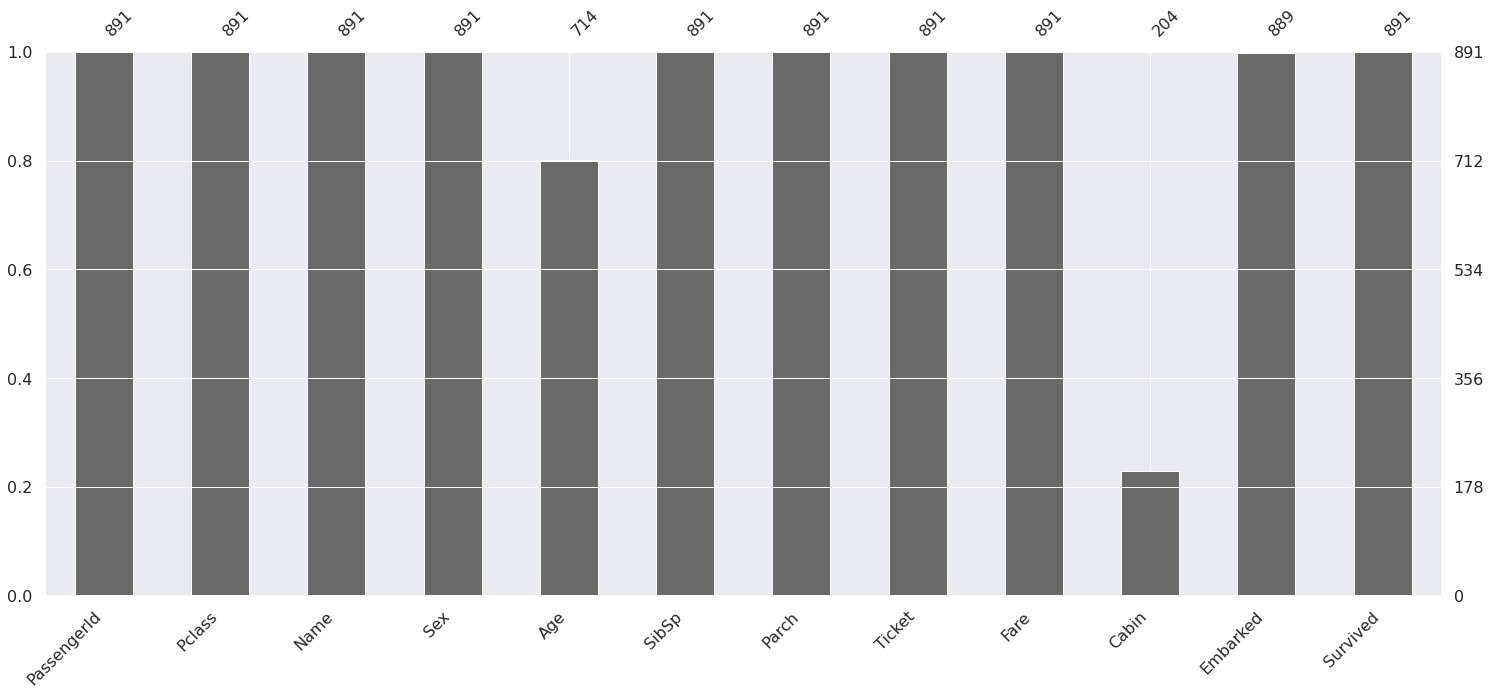

In [0]:
import missingno as msno
# msno.bar : 각 컬럼의 null 이 아닌 데이터의 비율을 그래프로 그려주는 모듈
# df_train을 PandasDataFrame으로 변환해서 그래프를 그림
msno.bar(df=df_train.toPandas())

# 생존과 관련 있는 컬럼 탐색
<br>

- 결측치가 많거나 관련 없는 컬럼 삭제

In [0]:
df_train.groupBy("Survived").count().show()

# 0 : 사망자 , 1 : 생존자

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



In [0]:
# 티켓 클래스 빈도수 조회
df_train.groupBy("Pclass").count().show()

+------+-----+
|Pclass|count|
+------+-----+
|     1|  216|
|     3|  491|
|     2|  184|
+------+-----+



In [0]:
# SQL 사용을 위해 SparkDataFrame 을 View(데이터 추가-수정 불가능 테이블) 형태로 변환
df_train.createOrReplaceTempView('titanic_view')


### `Pclass` 컬럼과 생존과의 관계 탐색

In [0]:
%sql

select * from titanic_view where Survived=1

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,1
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S,1
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C,1
11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7,G6,S,1
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S,1
16,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,null,S,1
18,2,"Williams, Mr. Charles Eugene",male,null,0,0,244373,13.0,null,S,1
20,3,"Masselmani, Mrs. Fatima",female,null,0,0,2649,7.225,null,C,1


In [0]:
%sql

-- 티켓 클래스별 생존자 수 조회
select Pclass, count(*) from titanic_view where Survived=1 group by Pclass

Pclass,count(1)
1,136
3,119
2,87


In [0]:
%sql

-- 티켓 클래스별 생존자, 사망자 수 조회
select Pclass, Survived, count(*) from titanic_view group by Pclass, Survived order by Pclass, Survived desc

Pclass,Survived,count(1)
1,1,136
1,0,80
2,1,87
2,0,97
3,1,119
3,0,372


In [0]:
# Pclass, Survived 칸을 교차해서 빈도수 조회
df_train.crosstab('Pclass', 'Survived').show()

+---------------+---+---+
|Pclass_Survived|  0|  1|
+---------------+---+---+
|              1| 80|136|
|              3|372|119|
|              2| 97| 87|
+---------------+---+---+




## `Sex` 컬럼과 생존과의 관계 탐색

In [0]:
%sql

-- 1 : 생존자 , 0 : 사망자
-- 성별 생존자, 사망자 수 조회
select Sex, Survived, count(*) from titanic_view group by Sex, Survived order by Sex, Survived desc

Sex,Survived,count(1)
female,1,233
female,0,81
male,1,109
male,0,468


In [0]:
df_train.crosstab('Sex', 'Survived').show()

+------------+---+---+
|Sex_Survived|  0|  1|
+------------+---+---+
|        male|468|109|
|      female| 81|233|
+------------+---+---+



Out[55]: <seaborn.axisgrid.FacetGrid at 0x7feb6ddd53a0>

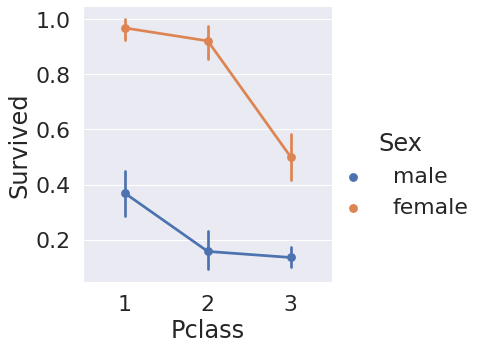

In [0]:
# 각 성별 Pclass 와 Survived 교차해서 그래프 그림
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train.toPandas())


## `Age` 와 생존과의 관계 탐색

In [0]:
# 생존자만 데이터 조회
df_train.filter(df_train['Survived']==1).show()

+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|    Fare|Cabin|Embarked|Survived|
+-----------+------+--------------------+------+----+-----+-----+----------------+--------+-----+--------+--------+
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599| 71.2833|  C85|       C|       1|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|   7.925| null|       S|       1|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|    53.1| C123|       S|       1|
|          9|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742| 11.1333| null|       S|       1|
|         10|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|          237736| 30.0708| null|       C|       1|
|         11|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|       

In [0]:
# 생존자만의 Age 컬럼 조회
df_train[['Age']].filter(df_train['Survived']==1).show()

+----+
| Age|
+----+
|38.0|
|26.0|
|35.0|
|27.0|
|14.0|
| 4.0|
|58.0|
|55.0|
|null|
|null|
|34.0|
|15.0|
|28.0|
|38.0|
|null|
|null|
|null|
|null|
|14.0|
| 3.0|
+----+
only showing top 20 rows



In [0]:
# 사망자만의 Age 컬럼 조회
df_train[['Age']].filter(df_train['Survived']==0).show()

+----+
| Age|
+----+
|22.0|
|35.0|
|null|
|54.0|
| 2.0|
|20.0|
|39.0|
|14.0|
| 2.0|
|31.0|
|35.0|
| 8.0|
|null|
|19.0|
|null|
|40.0|
|66.0|
|28.0|
|42.0|
|21.0|
+----+
only showing top 20 rows



Out[64]: <matplotlib.legend.Legend at 0x7feb740b8820>

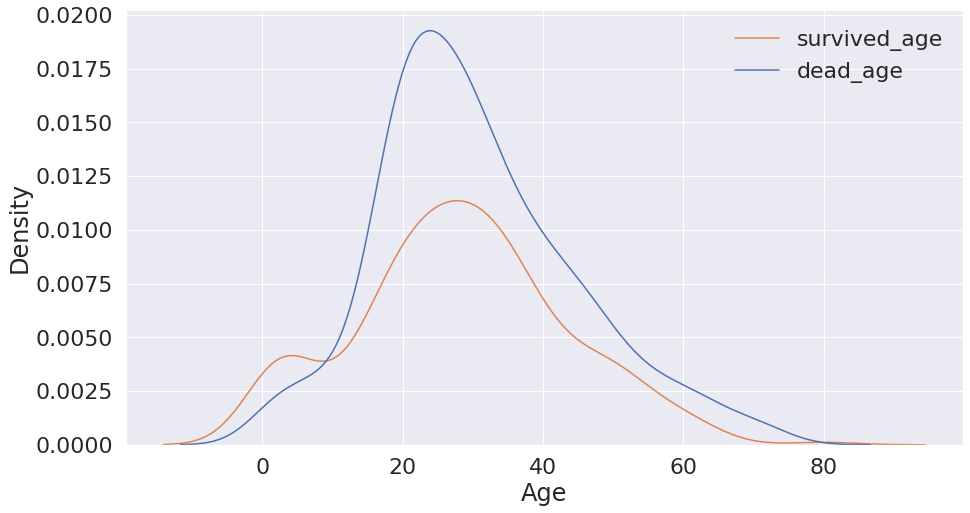

In [0]:
# 나이별 사망자 생존자 비율 그래프
plt.figure(figsize=(15,8))

sns.kdeplot(data=df_train.toPandas(), x="Age", hue="Survived")
# 범례 지정
plt.legend(['survived_age', 'dead_age'])


## `Embarked` 컬럼과 생존 사이의 관계 탐색

<br>

### `Embarked` : 타이타닉을 탄 항구

In [0]:
%sql

-- 탑승 항구별 사망자, 생존자 수 조회 
select Embarked, Survived, count(*) 
from titanic_view 
group by Embarked, Survived 
order by Embarked, Survived desc

Embarked,Survived,count(1)
null,1,2
C,1,93
C,0,75
Q,1,30
Q,0,47
S,1,217
S,0,427


In [0]:
# Embarked, Survived 칸을 교차해서 빈도수 조회
df_train.crosstab('Embarked', 'Survived').show()

+-----------------+---+---+
|Embarked_Survived|  0|  1|
+-----------------+---+---+
|             null|  0|  2|
|                Q| 47| 30|
|                S|427|217|
|                C| 75| 93|
+-----------------+---+---+



In [0]:
# Embarked, Pclass 칸을 교차해서 빈도수 조회
df_train.crosstab('Embarked', 'Pclass').show()

+---------------+---+---+---+
|Embarked_Pclass|  1|  2|  3|
+---------------+---+---+---+
|              S|127|164|353|
|              Q|  2|  3| 72|
|              C| 85| 17| 66|
|           null|  2|  0|  0|
+---------------+---+---+---+




### 위에서 본 것 처럼 C 항구의 생존자가 다른 곳에 비해 높은데
### Pclass와의 관계에서 본 것 처럼 1st 클래스의 좌석 비율이 C 항구에서 탄 사람들이 다른 곳에 비해 높다
### 즉, 1st 클래스의 생존 확률이 높다


## 상관 관계 분석

In [0]:
# 티켓 클래스와 생존 사이의 상관 관계
df_train.corr("Pclass", "Survived")

# 음의 값
## 티켓 등급이 1에서 2, 2에서 3 으로 증가할수록, 생존 비율이 낮아진다.
### 등급이 낮아야 생존율이 높다.

Out[68]: -0.33848103596101514

In [0]:
# 정수 및 실수, 숫자형 타입의 컬럼 데이터만 저장
numeric_col_names = []

for i in df_train.schema : 
    if (i.dataType == IntegerType()) or (i.dataType == DoubleType()):
        print("숫자형 타입 컬럼 : ", i.name)
        numeric_col_names.append(i.name)
        print("="*100)

숫자형 타입 컬럼 :  Pclass
숫자형 타입 컬럼 :  Age
숫자형 타입 컬럼 :  SibSp
숫자형 타입 컬럼 :  Parch
숫자형 타입 컬럼 :  Fare
숫자형 타입 컬럼 :  Survived


In [0]:
print(numeric_col_names)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


In [0]:
# 정수 및 실수형 타입 컬럼들과 생존 사이의 상관 관계 분석

for i in numeric_col_names:
    print(f"{i} 컬럼과의 생존 상관관계")
    print(df_train.corr(i,'Survived'))
    print("="*100)

Pclass 컬럼과의 생존 상관관계
-0.33848103596101514
Age 컬럼과의 생존 상관관계
0.010539215871285685
SibSp 컬럼과의 생존 상관관계
-0.03532249888573558
Parch 컬럼과의 생존 상관관계
0.08162940708348336
Fare 컬럼과의 생존 상관관계
0.2573065223849626
Survived 컬럼과의 생존 상관관계
1.0



---

In [0]:
df_train.crosstab('SibSp', 'Pclass').show()

+------------+---+---+---+
|SibSp_Pclass|  1|  2|  3|
+------------+---+---+---+
|           0|137|120|351|
|           5|  0|  0|  5|
|           1| 71| 55| 83|
|           2|  5|  8| 15|
|           3|  3|  1| 12|
|           8|  0|  0|  7|
|           4|  0|  0| 18|
+------------+---+---+---+



In [0]:
df_train.corr('Fare','Pclass')

Out[78]: -0.5494996199439076

In [0]:
df_train[['Cabin']].filter(df_train['Survived']==1).show()

+-----+
|Cabin|
+-----+
|  C85|
| null|
| C123|
| null|
| null|
|   G6|
| C103|
| null|
| null|
| null|
|  D56|
| null|
|   A6|
| null|
| null|
|  B78|
| null|
| null|
| null|
| null|
+-----+
only showing top 20 rows



In [0]:
df_train.crosstab('Cabin', 'Survived').show()

+---------------+---+---+
| Cabin_Survived|  0|  1|
+---------------+---+---+
|             D7|  0|  1|
|            E50|  0|  1|
|B57 B59 B63 B66|  0|  2|
|           E121|  0|  2|
|            E36|  0|  1|
|           null|481|206|
|           B101|  0|  1|
|            B80|  0|  1|
|        C62 C64|  0|  1|
|            E63|  1|  0|
|            E44|  1|  1|
|            D36|  0|  2|
|             B5|  0|  2|
|          F E69|  0|  1|
|            E25|  0|  2|
|             E8|  0|  2|
|            D19|  0|  1|
|            F38|  1|  0|
|            C90|  0|  1|
|            B94|  1|  0|
+---------------+---+---+
only showing top 20 rows



In [0]:
df_train.crosstab('Parch', 'Survived').show()

+--------------+---+---+
|Parch_Survived|  0|  1|
+--------------+---+---+
|             0|445|233|
|             5|  4|  1|
|             1| 53| 65|
|             6|  1|  0|
|             2| 40| 40|
|             3|  2|  3|
|             4|  4|  0|
+--------------+---+---+

